# Lane-Emden Differential Equation
$$
\begin{aligned}
&y''(x) + \frac{2}{x} y'(x) + y^m(x) = 0 \\
& y(0) = 1 \\
& y'(0) = 0
\end{aligned}
$$

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn, optim

In [2]:
def dy_dx(y, x):
    return torch.autograd.grad(
        y, x, grad_outputs=torch.ones_like(y), create_graph=True
    )[0]

In [3]:
x = torch.linspace(0, 5, 2000, requires_grad=True).reshape(-1, 1)

In [4]:
mlp = nn.Sequential(
    nn.Linear(1, 10),
    nn.Tanh(),
    nn.Linear(10, 20),
    nn.Tanh(),
    nn.Linear(20, 20),
    nn.Tanh(),
    nn.Linear(20, 1),
)

In [5]:
optimizer = optim.Adam(mlp.parameters(), lr=0.01)
losses = []

for i in range(2500):
    y = mlp.forward(x)
    y_x = dy_dx(y, x)
    y_xx = dy_dx(y_x, x)

    m = 2  # Lane-Emden Differential Equation with m=1

    residual = x * y_xx + 2 * y_x + x * y**m
    initial1 = y[0] - 1  # float
    initial2 = y_x[0] - 0  # float

    MSE = (residual**2).mean() + initial1**2 + initial2**2

    optimizer.zero_grad()
    MSE.backward()
    optimizer.step()

    losses.append(MSE.detach().numpy()[0])
    if i % 10 == 0:
        print("Epoch %3d: Current loss: %.2e" % (i, losses[-1]))

Epoch   0: Current loss: 5.48e-01
Epoch  10: Current loss: 6.32e-02
Epoch  20: Current loss: 1.11e-02
Epoch  30: Current loss: 5.97e-03
Epoch  40: Current loss: 3.86e-03
Epoch  50: Current loss: 2.35e-03
Epoch  60: Current loss: 1.26e-03
Epoch  70: Current loss: 7.86e-04
Epoch  80: Current loss: 5.68e-04
Epoch  90: Current loss: 4.22e-04
Epoch 100: Current loss: 3.38e-04
Epoch 110: Current loss: 2.96e-04
Epoch 120: Current loss: 2.67e-04
Epoch 130: Current loss: 2.44e-04
Epoch 140: Current loss: 2.23e-04
Epoch 150: Current loss: 2.04e-04
Epoch 160: Current loss: 1.86e-04
Epoch 170: Current loss: 1.69e-04
Epoch 180: Current loss: 1.54e-04
Epoch 190: Current loss: 1.41e-04
Epoch 200: Current loss: 1.29e-04
Epoch 210: Current loss: 1.18e-04
Epoch 220: Current loss: 1.08e-04
Epoch 230: Current loss: 9.98e-05
Epoch 240: Current loss: 9.24e-05
Epoch 250: Current loss: 8.58e-05
Epoch 260: Current loss: 8.01e-05
Epoch 270: Current loss: 7.51e-05
Epoch 280: Current loss: 7.08e-05
Epoch 290: Cur

In [6]:
x_test = torch.linspace(0, 5, 10000)[1:].reshape(-1, 1)
predict = mlp.forward(x_test).detach()

indx_root = torch.argmin(torch.abs(predict))
root_state_of_the_art = 4.35287460

print("Error Predicted Root: %.2e" % (x_test[indx_root].item() - root_state_of_the_art))

Error Predicted Root: 2.06e-03


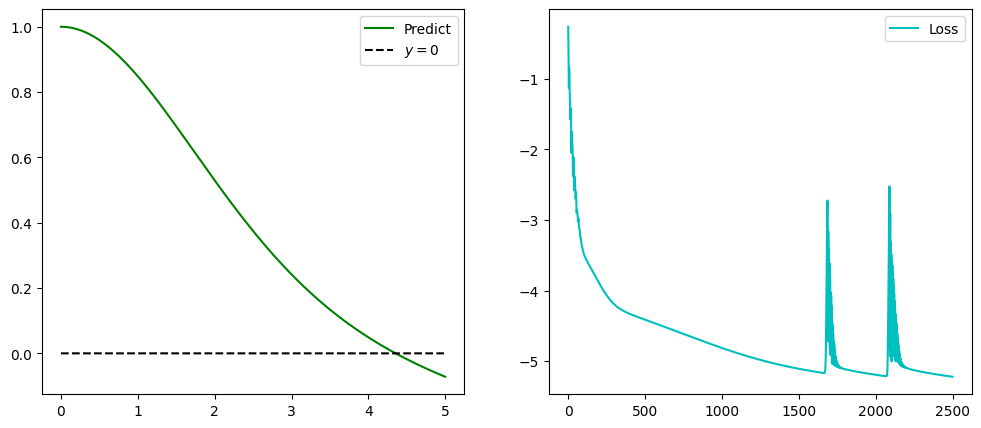

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(x_test, predict, "g-", label="Predict")
axs[0].plot(x_test, predict * 0, "k--", label="$y=0$")

axs[1].plot(np.log10(losses), "c", label="Loss")

for ax in axs:
    ax.legend()